In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import cv2
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.model_selection import KFold
import albumentations as A
from ImageDataAugmentor.image_data_augmentor import ImageDataAugmentor
#from ImageDataAugmentor.image_data_augmentor import ImageDataAugmentor

print(tf.__version__)
meta_path="/Users/omarabu-rmaileh/Desktop/data csv files/files after data manipulation/trial_2020_WO.csv"
image_path="/Users/omarabu-rmaileh/Desktop/DATA/Train_imgs/train/"
train_path="/Users/omarabu-rmaileh/Desktop/ISIC_TEST/DATA/"
val_path="/Users/omarabu-rmaileh/Desktop/DATA/Train_imgs/train"
test_csv_p="/Users/omarabu-rmaileh/Desktop/data csv files/files after data manipulation/test.csv"



img_h = 100
img_w =100
batch_size = 32


CATEGORIES = ["benign","see doc" ]

#train path csv
#have to store data  to put data into the dataframe
train_pics=pd.read_csv(meta_path)

train_pics.fillna(0, inplace=True)
train_pics_fr=pd.DataFrame(train_pics, columns=['image', 'BE_ME'])

train_pics_fr['BE_ME'] = train_pics['BE_ME'].astype(str)




#train_df['image']=train_df['image']+".jpg"
X_train=train_pics_fr['image']

#Y_train=np.array(train_data['BE_ME'])

#test path csv
test_pics=pd.read_csv(test_csv_p)
test_pics.fillna(0, inplace=True)
test_pics=pd.DataFrame(train_pics_fr, columns=['image', 'BE_ME'])


test=25476
#this print is to make sure we are recieving the right columns and values of the image and to see if the image is malignanyt or not 
print(train_pics_fr.iloc[test])



2.6.2
image    ISIC_7730443
BE_ME          benign
Name: 25476, dtype: object


In [2]:
from PIL import Image
train_pic_path="/Users/omarabu-rmaileh/Desktop/DATA/Train_imgs/"
test_pic_path="/Users/omarabu-rmaileh/Desktop/DATA/Test_imgs/"



filenames = os.listdir(train_pic_path)[:5]

for file_name in os.listdir(train_pic_path):
    # Check if the file is a jpg image
    for i in range(5):
        if file_name.endswith('.jpg'):
            # Open and display the image
            img_path = os.path.join(train_pic_path, file_name)
            img = Image.open(img_path)
            img.show()
    break;

In [3]:
#OTHER AUGMENTED IMAGES FOR OTHER TIME
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

# this wil just be a simple augmented image to test 
test_datagen = ImageDataGenerator(rescale=1. / 255.0)



In [4]:
#transforms_train
changed = A.Compose([
        A.Transpose(p=0.5),
        A.VerticalFlip(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.Rotate(p=0.5),
       
       
        A.OneOf([
                A.MotionBlur(blur_limit=5),
                A.MedianBlur(blur_limit=5),
                
                A.GaussNoise(var_limit=(5.0, 30.0))
                ], p=0.7),
        A.OneOf([
                A.OpticalDistortion(distort_limit=1.0),
                A.GridDistortion(num_steps=5, distort_limit=1.),
                A.ElasticTransform(alpha=3)
                ], p=0.7),
         A.CLAHE(clip_limit=4.0, p=0.7),
        A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, border_mode=0, p=0.85),
        A.Resize(width=512, height=512),
        A.CoarseDropout(max_height= int(100*0.375), max_width= int(100*0.375), min_holes=1, p=0.7),
       A.Normalize()
    ])

changed_val = A.Compose([
        A.Resize(512,512),
        A.Normalize()
    ])
transforms_test = A.Compose([
        A.Resize(512, 512),
        A.Normalize()
])


        
train_path= ImageDataAugmentor(
       #rescale=1./255,
        augment = changed,
        preprocess_input = None, 
        seed=42,
        validation_split = 0.2) # Define validation split i.e 20% data is used for validation


valid_path = ImageDataAugmentor(
           # rescale=1./255,
            augment = changed_val,
            preprocess_input = None, 
         
            seed=42,
            validation_split = 0) 




Found 26501 images belonging to 1 classes.
Found 6625 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


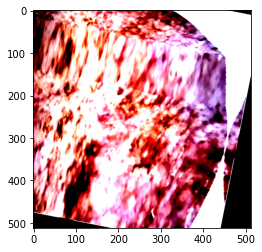

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


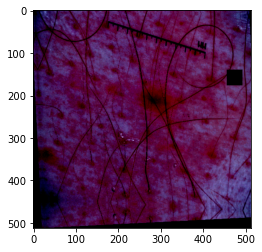

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


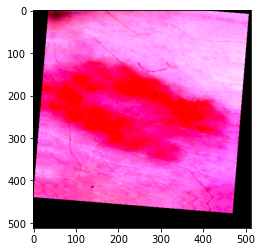

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


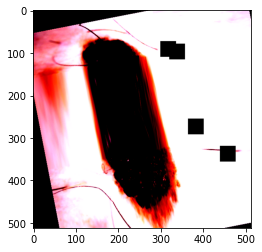

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


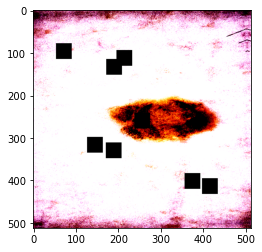

In [5]:
batch_size = 32
#usese imagedatagenerator to alter images in real time
# the train  begins to store the images utilizes the moethod flow from directory 

#flow from directory read the images from a big numpy array and folders containing images.

train = train_path.flow_from_directory(
    directory=train_pic_path,
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,

)
valid = train_path.flow_from_directory(
    directory=train_pic_path,
    target_size=(512, 512),
   
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    #seed=42
)
test_generator = valid_path.flow_from_directory(
    directory=test_pic_path,
    target_size=(512, 512),
    
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=False,
   # seed=42
)

###################################

for images, labels in train:
    # Loop over the images in the current batch
    for i in range(5):
        # Display the i-th image in the current batch
        plt.imshow(images[i])
        plt.show()
    break

  



In [ ]:
input_shape=(512, 512, 3)  # 3 is for 3 colors (RGB)


model = keras.Sequential()
model.add(layers.Flatten(name='top_flatten'))
model.add(layers.Dense(500, activation='relu', name='500'))

model.add(layers.Dense(256, activation='relu', name='256'))
#model.add(layers.Dense(128, activation='relu'))

#model.add(layers.Dense(128, activation='relu'))
#just need benign or not benign as the outer layer thats why the value is 2
model.add(layers.Dense(2, activation='softmax', name='deciderr'))
    
#offset is to increase the range from -1 to 1 which allows the machine learning layer properly predict the mole when found
    
# model.add(layers.Flatten(name='top_flatten'))
# model.add(layers.Dense(256, activation='relu', name='dense_500', input_shape=(200,)))
# model.add(layers.Dense(128, activation='relu', name='dense_256'))
# model.add(layers.Dense( 2,activation='softmax', name='output_layer'))



In [ ]:

model.compile(optimizer='Adam',
  loss='categorical_crossentropy', 
  metrics=['accuracy'])



model.fit(
  train,
  validation_data=valid,
  shuffle=True,
  verbose = 1,
  epochs=10
)

#save model to use in application to an .h5 file
model.save("/Users/omarabu-rmaileh/Desktop/mel_model/model.h5")

score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



In [ ]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
#this will print the stats on th x axis of epoch and y axis of accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)